In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [6]:
X, y = mnist.data, mnist.target

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

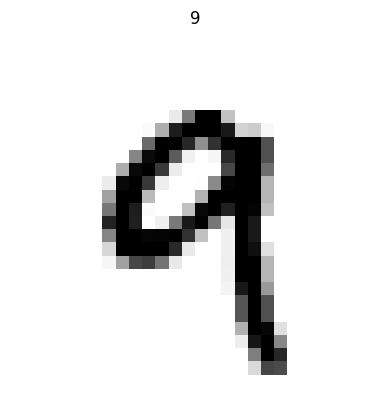

In [17]:
import matplotlib.pyplot as plt

index = 110

image = X[index].reshape(28,28)
plt.imshow(image, cmap='binary')
plt.title(y[index])
plt.axis('off')

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [3]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype("int")

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

e:\bi_and_ai\bi-and-ai-talents-ml\hometasks\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [29]:
y_pred = clf.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.916
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.89      0.90      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.89      0.86      0.88      1273
           6       0.93      0.95      0.94      1396
           7       0.93      0.93      0.93      1503
           8       0.88      0.87      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



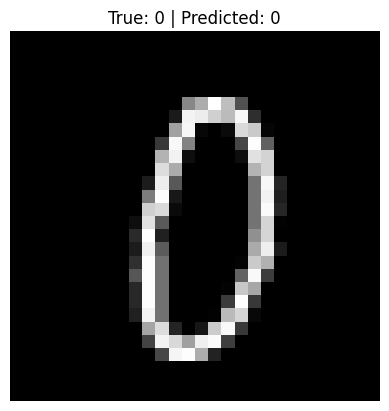

In [33]:
def show_prediction(index):
    image = X_test[index].reshape(28, 28)
    plt.imshow(image, cmap="gray")
    plt.title(f"True: {y_test[index]} | Predicted: {y_pred[index]}")
    plt.axis("off")
    plt.show()

show_prediction(20)

In [23]:
from pathlib import Path
from PIL import Image, ImageOps
import numpy as np

def to_mnist_array(img_path, invert=True):
    img_path = Path(img_path)
    if not img_path.exists():
        raise FileNotFoundError(img_path)
    
    img = Image.open(img_path).convert("L")
    if invert and np.mean(img) > 127:
        img = ImageOps.invert(img)
    img = img.resize((28, 28), Image.Resampling.LANCZOS)
    arr = np.asarray(img)

    return arr

In [24]:
from pathlib import Path

image_path = Path("images/3_1.png")
a = to_mnist_array(image_path)

In [25]:
a

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,  17],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,  17],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,  17],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,
          2,   4,   4,   4,   4,   4,   4,   1,   0,   0,   0,   0,   1,
          0,  17],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   1,
          0,  17],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,  17,
         58, 146, 152, 151, 151, 152, 141,  53,   0,   1,   0,   0,   1,
          0,  17],
       [  

In [13]:
import os, pathlib
print("cwd:", os.getcwd())
print("Exists?", pathlib.Path("../images/3_1.png").resolve())

cwd: e:\bi_and_ai\bi-and-ai-talents-ml\hometasks\lesson-7
Exists? E:\bi_and_ai\bi-and-ai-talents-ml\hometasks\images\3_1.png
